In [1]:
# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
import io
import base64
from io import BytesIO
from PIL import Image
from PIL import ImageOps
import numpy as np

# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For measuring the inference time.
import time

from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont


2023-06-25 20:36:59.487575: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 20:36:59.510056: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 20:36:59.510460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 20:36:59.962922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: 


# Download Example Images:

In [2]:
def display_image(image):
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

def display_image_from_base64(image_data):
    imgdata = base64.b64decode(image_data)
    image = Image.open(BytesIO(imgdata))
    display_image(image)
    
    
def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
    _, filename = tempfile.mkstemp(suffix=".jpg")
    response = urlopen(url)
    image_data = response.read()
    image_data = BytesIO(image_data)
    pil_image = Image.open(image_data)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert("RGB")
    pil_image_rgb.save(filename, format="JPEG", quality=90)
    print("Image downloaded to %s." % filename)
    if display:
        display_image(pil_image)
    return filename

/tmp/ipykernel_29787/629627583.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)


Image downloaded to /tmp/tmpfok8we8a.jpg.
Image downloaded to /tmp/tmpfmoadaud.jpg.
Image downloaded to /tmp/tmpwgbuem80.jpg.


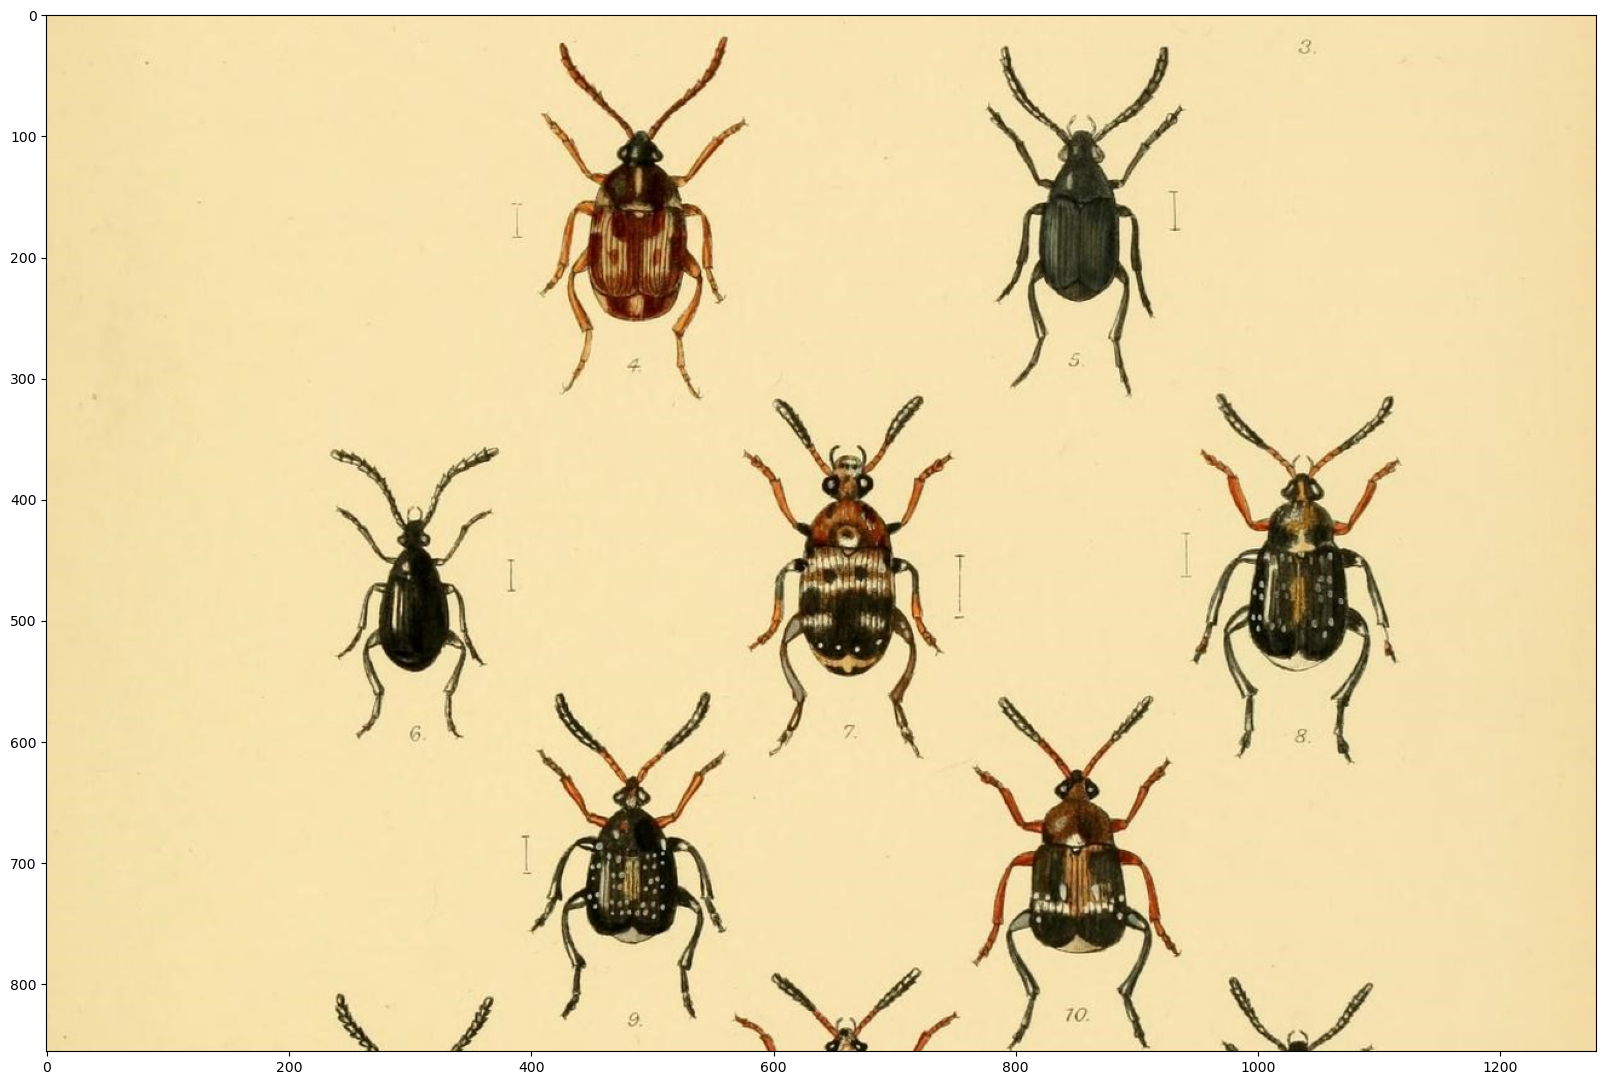

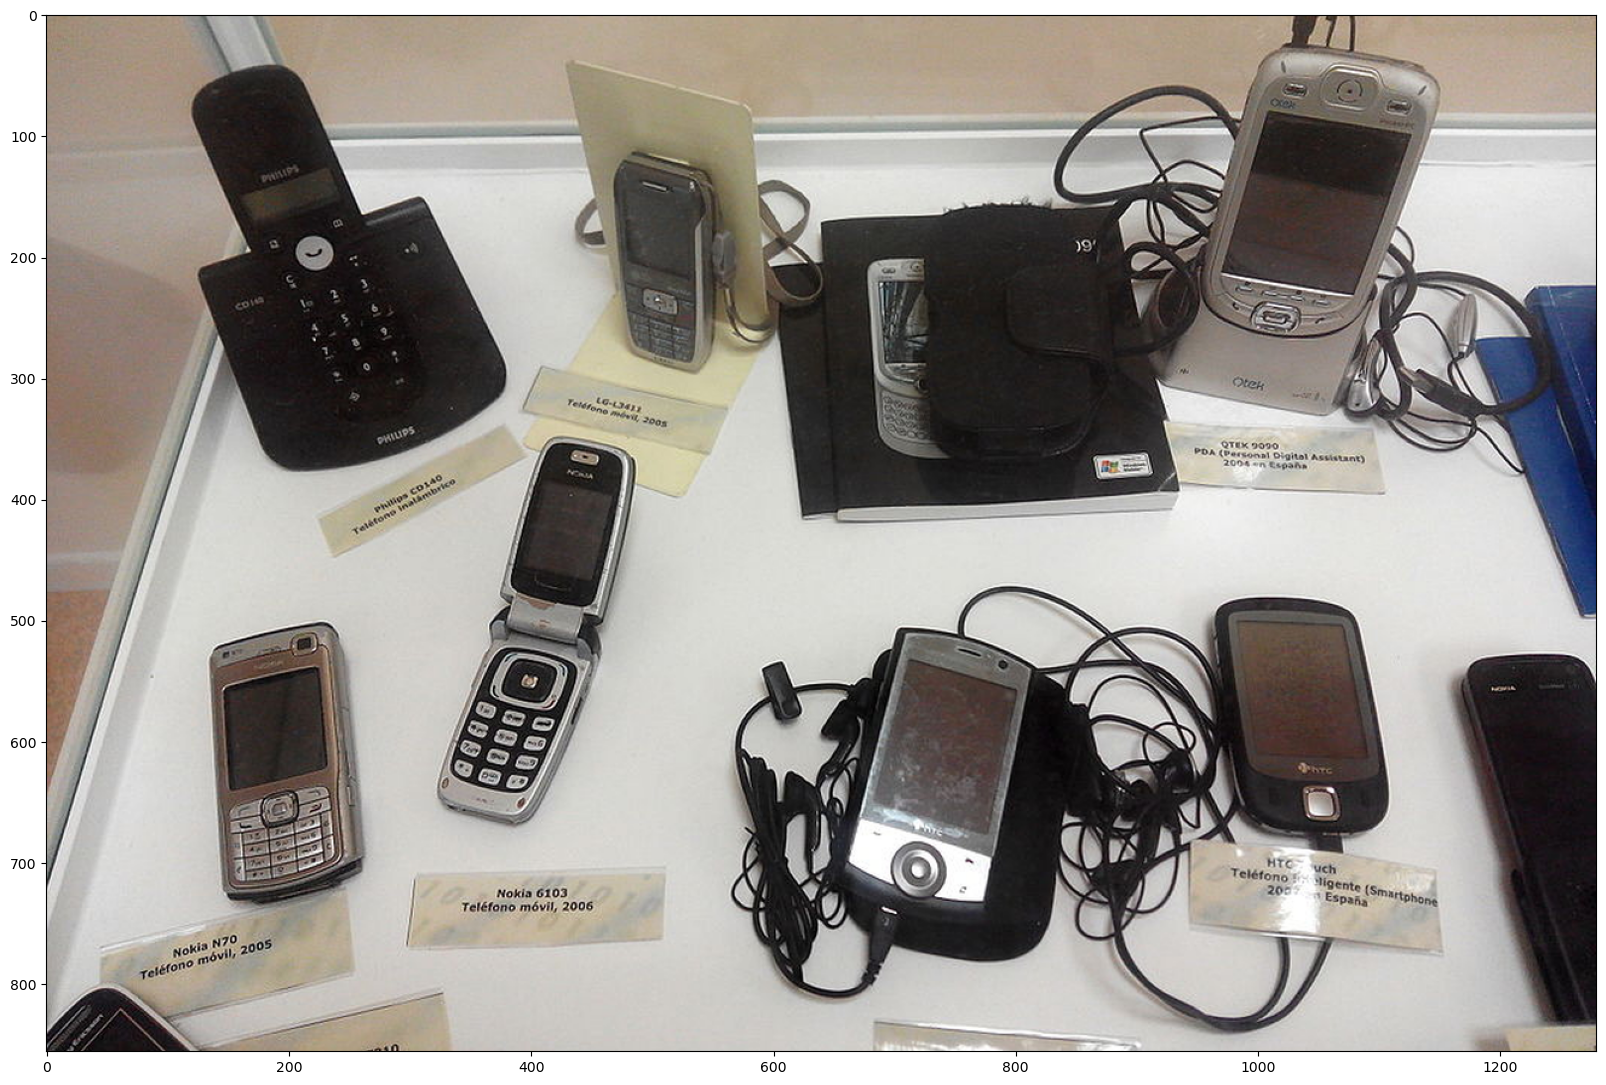

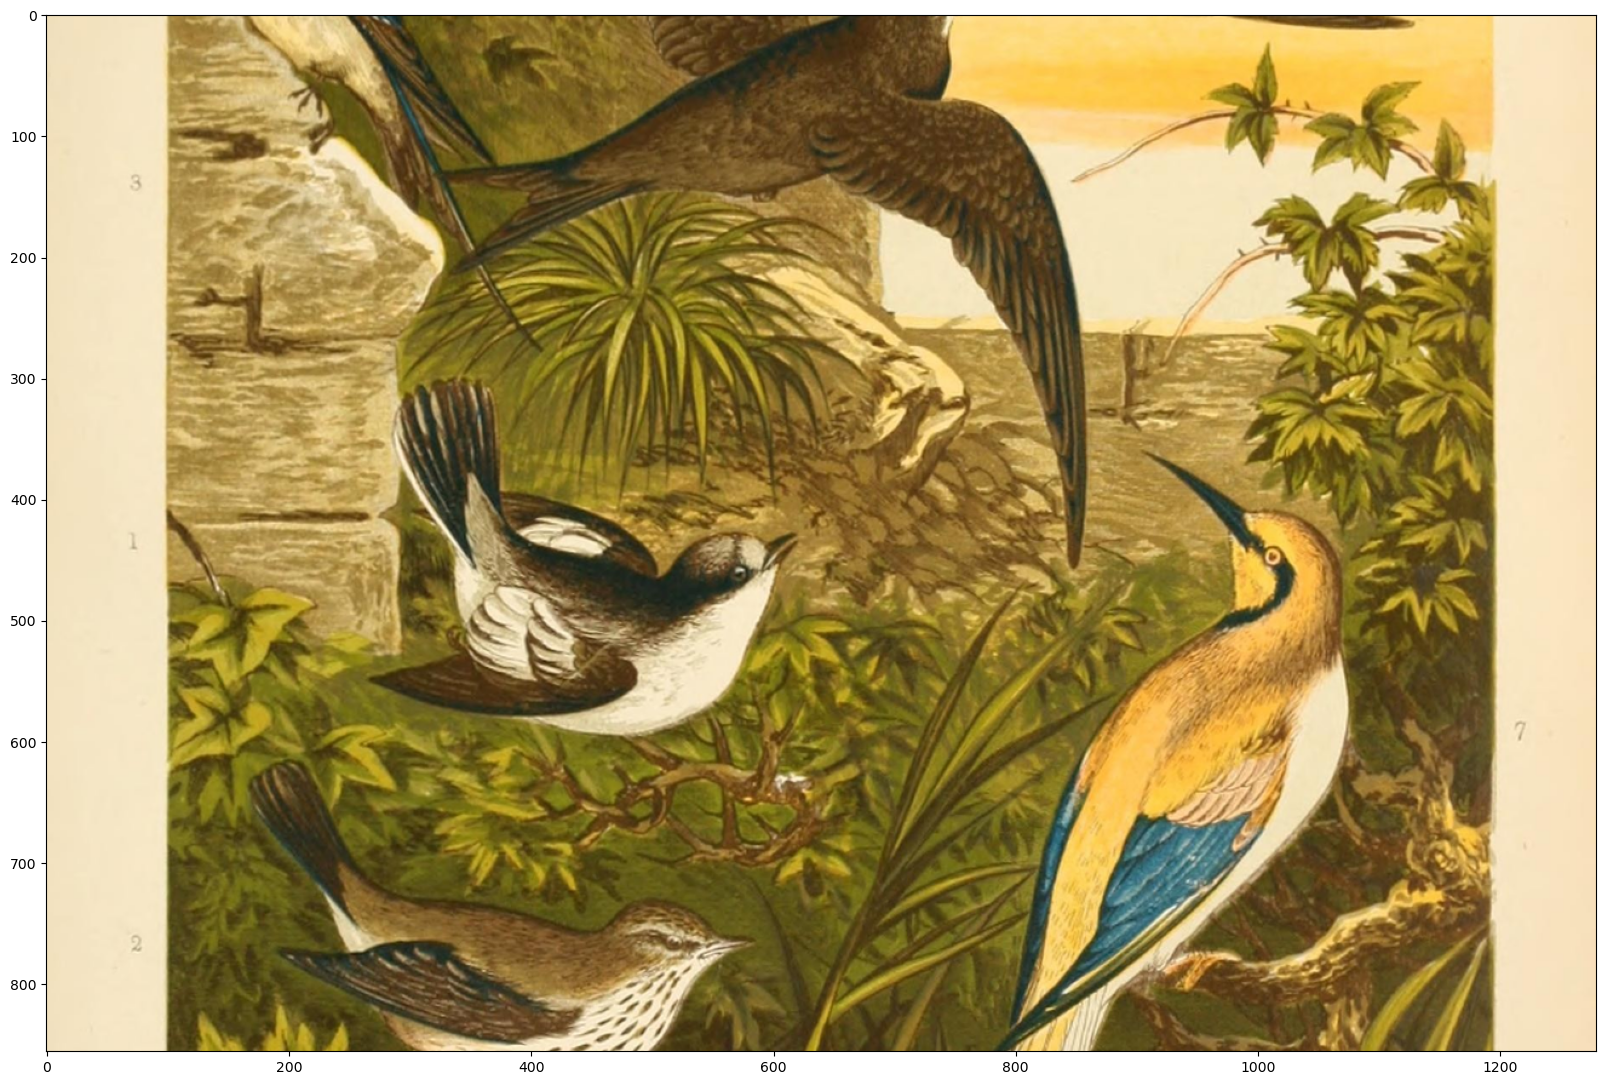

In [3]:
# By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
#image_url = "https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg"  #@param

#downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

image_urls = [
  # Source: https://commons.wikimedia.org/wiki/File:The_Coleoptera_of_the_British_islands_(Plate_125)_(8592917784).jpg
  "https://upload.wikimedia.org/wikipedia/commons/1/1b/The_Coleoptera_of_the_British_islands_%28Plate_125%29_%288592917784%29.jpg",
  # By Américo Toledano, Source: https://commons.wikimedia.org/wiki/File:Biblioteca_Maim%C3%B3nides,_Campus_Universitario_de_Rabanales_007.jpg
  "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg/1024px-Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg",
  # Source: https://commons.wikimedia.org/wiki/File:The_smaller_British_birds_(8053836633).jpg
  "https://upload.wikimedia.org/wikipedia/commons/0/09/The_smaller_British_birds_%288053836633%29.jpg",
]

img_list = []
for image_url in image_urls:
    img_list.append(download_and_resize_image(image_url, 1280, 856, True))

# Transform Images to String:

In [4]:
images = []
for item in img_list:
    with open(item, "rb") as img_file:
        images.append(base64.b64encode(img_file.read()))
        
print(images[0])

b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCANYBQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD71+7RRRX5ZofUBTx0oX7tJ/CPrRoA8dKWiijQAp8famU4dKdkBP8AwU1elMHSnp1o0AWlXpTP4qlPQVQCHoaB0FI1C0APWlxmkWlzigBGXApjdqezZFNoAcvSlpo606gAFC96KKACigdaF5agAHWn0bMUU7AH3aP46KZ9Pk

In [10]:
def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
    """Adds a bounding box to an image."""
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

    # If the total height of the display strings added to the top of the bounding
    # box exceeds the top of the image, stack the strings below the bounding box
    # instead of above.
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = top + total_display_str_height
    # Reverse list and print from bottom to top.
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
        draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
        text_bottom -= text_height - 2 * margin



def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
    """Overlay labeled boxes on an image with formatted scores and label names."""
    colors = list(ImageColor.colormap.values())

    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
    except IOError:
        print("Font not found, using default font.")
        font = ImageFont.load_default()

    for i in range(min(boxes.shape[0], max_boxes)):
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = tuple(boxes[i])
            display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                         int(100 * scores[i]))
            color = colors[hash(class_names[i]) % len(colors)]
            image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
            draw_bounding_box_on_image(
              image_pil,
              ymin,
              xmin,
              ymax,
              xmax,
              color,
              font,
              display_str_list=[display_str])
            np.copyto(image, np.array(image_pil))
    return image

In [37]:
def image_base64_to_input_format(image_data):
    imgdata = base64.b64decode(image_data)
    image = Image.open(BytesIO(imgdata))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((1, im_height, im_width, 3)).astype(np.uint8)

def input_format_to_image_base64(input_image):
    image = Image.fromarray( np.asarray(input_image))
    with BytesIO() as buffer:
        image.save(buffer, format="PNG")
        image_data = buffer.getvalue()
    image_base64 = base64.b64encode(image_data).decode('utf-8')
    return image_base64

# Application:

Objectdetection: the application takes as input an image and returns the objects that have been detected on the image. It should also work for multiple images. Images are sent to the application via Post request as an array of base64 encoded Strings. Results should be returned as JSON Response.

# Version 1:

tf.Tensor(
[[0.01372382 0.12346613 0.97706187 0.88402593]
 [0.38263807 0.7397843  0.66907775 0.8743146 ]
 [0.6601585  0.31931013 0.90906465 0.44268602]
 [0.67145723 0.598906   0.92133194 0.72812337]
 [0.660006   0.6017804  0.90846616 0.7298161 ]
 [0.02676624 0.14195576 0.9712445  0.88836324]
 [0.6922741  0.3170913  0.9315429  0.43911624]
 [0.4110182  0.17698982 0.6711599  0.3001611 ]
 [0.4110182  0.17698982 0.6711599  0.3001611 ]
 [0.38263807 0.7397843  0.66907775 0.8743146 ]
 [0.64715755 0.3396343  0.79149294 0.43861723]
 [0.67145723 0.598906   0.92133194 0.72812337]
 [0.9397562  0.1988433  1.         0.30365682]
 [0.94937897 0.19275256 1.         0.21723185]
 [0.04692146 0.3199987  0.3287393  0.45320258]
 [0.39180458 0.44723034 0.6793885  0.5828191 ]
 [0.69915175 0.34329778 0.81458795 0.42774397]
 [0.6922741  0.3170913  0.9315429  0.43911624]
 [0.63077813 0.22380343 0.69968015 0.266185  ]
 [0.04692146 0.3199987  0.3287393  0.45320258]], shape=(20, 4), dtype=float32)


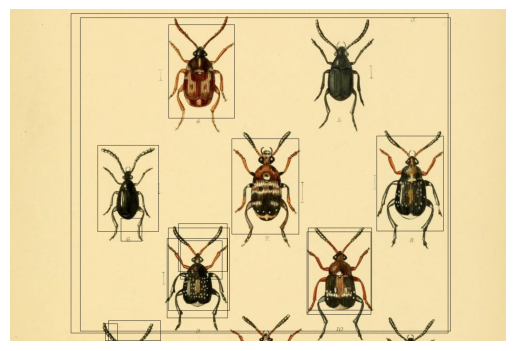

Done!
tf.Tensor(
[[0.5858966  0.10332328 0.8531749  0.20296523]
 [0.55472696 0.75356483 0.79464376 0.8572917 ]
 [0.58427936 0.5063074  0.9080846  0.64443415]
 [0.02740631 0.7290316  0.33958665 0.8903089 ]
 [0.38278097 0.2596764  0.7872693  0.39415473]
 [0.39815778 0.26141304 0.7927447  0.38886118]
 [0.11235142 0.1047641  0.4358365  0.28503925]
 [0.17218402 0.47608936 0.34050515 0.7373197 ]
 [0.42848474 0.3006764  0.5680569  0.38057315]
 [0.5833677  0.7447533  0.8707243  0.86777014]
 [0.03125042 0.007175   0.99806935 0.99018943]
 [0.61036396 0.90874475 0.9579897  1.        ]
 [0.02740631 0.7290316  0.33958665 0.8903089 ]
 [0.17027685 0.10566647 0.44066116 0.29006487]
 [0.19938624 0.5080289  0.46864724 0.7252781 ]
 [0.09708403 0.35307437 0.34893525 0.46484786]
 [0.5858966  0.10332328 0.8531749  0.20296523]
 [0.03125042 0.007175   0.99806935 0.99018943]
 [0.17027685 0.10566647 0.44066116 0.29006487]
 [0.02668117 0.09489411 0.4578789  0.29045317]], shape=(20, 4), dtype=float32)


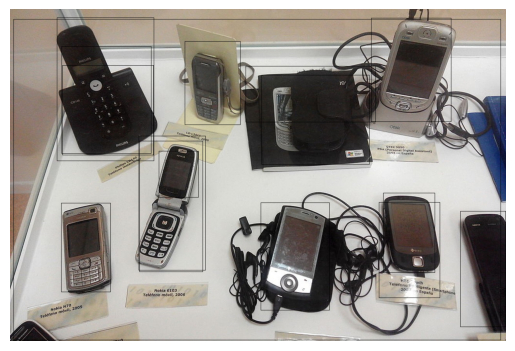

Done!
tf.Tensor(
[[0.37364623 0.22576295 0.68591464 0.47090447]
 [0.37449574 0.22075476 0.68221545 0.47653967]
 [0.00877061 0.09137434 0.98346436 0.85699147]
 [0.00382292 0.08922976 0.98300576 0.86313087]
 [0.7285907  0.10820657 0.98702943 0.40986007]
 [0.00877061 0.09137434 0.98346436 0.85699147]
 [0.35229164 0.23927444 0.6624896  0.3705879 ]
 [0.00877061 0.09137434 0.98346436 0.85699147]
 [0.03524375 0.7142284  0.8109789  0.9382101 ]
 [0.21762088 0.17228664 0.6676409  0.5415446 ]
 [0.01102349 0.6447787  0.9728075  0.94778275]
 [0.5031204  0.08500677 0.9612788  0.46719915]
 [0.01294118 0.07339889 0.675848   0.6747667 ]
 [0.50526595 0.6133362  0.99170935 0.8385216 ]
 [0.741205   0.11158338 0.99676776 0.29656214]
 [0.38123533 0.14325191 0.7855468  0.4709775 ]
 [0.38123533 0.14325191 0.7855468  0.4709775 ]
 [0.85653174 0.14235526 0.99481726 0.4518487 ]
 [0.35229164 0.23927444 0.6624896  0.3705879 ]
 [0.8387177  0.14346917 0.99943876 0.45103133]], shape=(20, 4), dtype=float32)


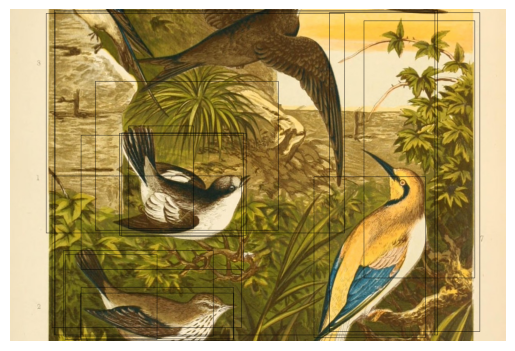

Done!


In [58]:
#module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
#module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

def detection_loop(images):
    bounding_boxes = []
    inf_times = []
    for image in images:
        # decode image string:
        image_tensor = image_base64_to_input_format(image)
        #img = np.array(Image.open(io.BytesIO(base64.b64decode(image))))
        #display_image(img)

        #converted_img  = tf.image.convert_image_dtype(decoded_tensor, tf.float32)[tf.newaxis, ...]
        start_time = time.time()
        result = detector(image_tensor)
        end_time = time.time()

        #result = {key:value.numpy() for key,value in result.items()}
        colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
        boxes = result["detection_boxes"][0][:20]
        print( boxes)
        expanded =  np.expand_dims(boxes, axis=0)
        res_image = tf.image.draw_bounding_boxes(image_tensor, expanded, colors)
        #display_image()
      
        res_image = np.squeeze(res_image)
        res_image = res_image.astype(np.uint8)
# Display the image using Matplotlib
        plt.imshow(res_image)
        plt.axis('off')  # Turn off axis labels
        plt.show()
        # display_image = input_format_to_image_base64(res_image)
        # display_image_from_base64(display_image)
        # print("Found %d objects." % len(result["num_detections"]))
        # print("Inference time: ", end_time-start_time)
        # print(result["detection_boxes"],)

        bounding_boxes.append(result["detection_boxes"])
        inf_times.append(end_time-start_time)
        print("Done!")
"""
        data = {"status": 200,
              "bounding_boxes": bounding_boxes,
              "inf_time": inf_times,
              "avg_inf_time": str(np.mean(inf_times)),
              "upload_time": [],
              "avg_upload_time": ""}
"""
    #return make_response(jsonify(data), 200)
    #return(data)


result = detection_loop(images)



In [ ]:
result["inf_time"]

# Version 2 (with load images):

In [ ]:
def detection_loop(filename_image):
  # input is a list of filenames to images

  # load object detection module:
  module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
  detector = hub.load(module_handle).signatures['default']

  bounding_boxes = []
  inf_times = []
  upload_times = []
  for filename in filename_image:

    # load image:
    start_time = time.time()
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    end_time = time.time()
    upload_times.append(end_time-start_time)

    # detect objects on image:
    converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()

    result = {key:value.numpy() for key,value in result.items()}

    print("Found %d objects." % len(result["detection_scores"]))
    print("Inference time: ", end_time-start_time)

    bounding_boxes.append(result["detection_boxes"])
    inf_times.append(end_time-start_time)
  print("Detection Done!")

  data = {"status": 200,
          "bounding_boxes": bounding_boxes,
          "inf_time": inf_times,
          "avg_inf_time": str(np.mean(inf_times)),
          "upload_time": upload_times,
          "avg_upload_time": str(np.mean(upload_times))}

  return make_response(jsonify(data), 200)